In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from classification_models.tfkeras import Classifiers

ModuleNotFoundError: No module named 'classification_models'

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import classification_report
import pickle

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import specgram
import librosa
import librosa.display

In [4]:
from fastai import *
from fastai.vision import *

In [5]:
#from fastai_tf_fit import *

In [6]:
import sys
import onnx

In [7]:
modelspath = 'models'
if not os.path.exists(modelspath):
    os.makedirs(modelspath)

fulldatasetpath = '../downsampled/'

spectrogram_path = '../downsampled/spectrogram'
if not os.path.exists(spectrogram_path):
    os.makedirs(spectrogram_path)

metadata = pd.read_csv('../UrbanSound8K.csv')


le = LabelEncoder()
le.fit(metadata['class'])
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [8]:
X = list(fulldatasetpath + metadata['slice_file_name'].astype(str))
folds = metadata['fold']

In [14]:
imtest = Image.open('7061-6-0-0.png')
imtest = np.asarray(imtest)
Image.fromarray(imtest).save('imtest.png')

In [15]:
imtest.shape

(217, 223, 4)

In [17]:
def _save_spectrogram(file, sr): 
    spectrogram_path = f'{os.path.dirname(file)}/spectrogram'
    imgname = os.path.basename(file).replace('.wav','.png')
    img_path  = f'{spectrogram_path}/{imgname}'
    if not os.path.isfile(img_path):
        if not os.path.exists(spectrogram_path):
            os.makedirs(spectrogram_path)
        try:
            signal, sampling_freq = librosa.load(file, sr)
        except Exception as e:
            print(e)
            print("Failed to read {}".format(file))
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        S = librosa.feature.melspectrogram(y=signal, sr=sampling_freq)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(img_path, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')
        return img_path

In [19]:
_save_spectrogram("D:/Classes/Robotics/capstone-project-3/audio/resnet/100032-3-0-0.wav", 8000)

'D:/Classes/Robotics/capstone-project-3/audio/resnet/spectrogram/100032-3-0-0.png'

In [34]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(file, sr):
    spectrogram_path = f'{os.path.dirname(file)}/spectrogram'
    imgname = os.path.basename(file).replace('.wav','.png')
    img_path  = f'{spectrogram_path}/{imgname}'
    # use log-melspectrogram
    signal, sampling_freq = librosa.load(file, sr)
    mels = librosa.feature.melspectrogram(y=signal, sr=sr)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)
    mels = librosa.power_to_db(mels, ref=np.max)
    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    #img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    #img = 255-img # invert. make black==more energy

    # save as PNG
    Image.fromarray(img).save(img_path)

In [1]:
os.listdir()

NameError: name 'os' is not defined

In [35]:
spectrogram_image("D:/Classes/Robotics/capstone-project-3/audio/resnet/100032-3-0-0.wav", 8000)

In [10]:
import os
import glob
import shutil
from pathlib import Path  
data_path = Path('../downsampled/imagenet_structure/') 
spectrogram_path = Path('../downsampled/spectrogram/')  
labels  = ['air_conditioner','car_horn','children_playing',
           'dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']
def create_fold_directory(fold):
    png_files =  list(Path(spectrogram_path/fold).glob('*.png'))
    os.mkdir(data_path/fold)
    os.mkdir(data_path/fold/'train')
    os.mkdir(data_path/fold/'valid')
    for label in labels:
        os.mkdir(data_path/fold/'train'/label)
        os.mkdir(data_path/fold/'valid'/label)
     
    for file in png_files:
        label = file.as_posix().split('-')[1]
        shutil.copyfile(file, data_path/fold/'valid'/labels[int(label)]/file.name)   
    for i in range(1, 11):       
        if str(i) == fold:
            continue
        png_files =  list(Path(spectrogram_path/str(i)).glob('*.png'))
        for file in png_files:
            label = file.as_posix().split('-')[1]
            shutil.copyfile(file, data_path/fold/'train'/labels[int(label)]/file.name)

In [11]:
# for i in range(1, 11):
#     create_fold_directory(str(i))

In [12]:
# for i,f in enumerate(X):
#     create_spectrogram(file=f, sr=8000, fold=folds[i])

In [13]:
# test = {f:l for (f,l) in zip(["{}spectrogram/1/{}".format(fulldatasetpath, f.replace('.wav','.png')) for f in metadata[metadata['fold']==1]['slice_file_name']], metadata[metadata['fold']==1]['class'])}

In [14]:
###DO NOT DELETE.  ASK ABOUT from_lists ISSUE

# spectrogram_fnames1 = [Path("{}/spectrogram/1/{}".format(fulldatasetpath, f.replace('.wav','.png'))) for f in metadata[metadata['fold']==1]['slice_file_name']]
# data1 = ImageDataBunch.from_lists(path = f'{fulldatasetpath}/spectrogram/1', 
#                                  fnames = spectrogram_fnames1, 
#                                  labels = metadata[metadata['fold']==1]['class'], 
#                                  ds_tfms=[],
#                                  size = (223,217), 
#                                  bs = 64
#                                 )

In [15]:
# data1.normalize(imagenet_stats)

In [16]:
# data1.show_batch(rows=8, figsize=(12,12))

In [17]:
data1FF = ImageDataBunch.from_folder("../downsampled/imagenet_structure/1", ds_tfms=[], size=(223,217), bs = 64, num_workers = 1)
data1FF.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (7859 items)
x: ImageList
Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217)
y: CategoryList
air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner
Path: ..\downsampled\imagenet_structure\1;

Valid: LabelList (873 items)
x: ImageList
Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217)
y: CategoryList
air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner
Path: ..\downsampled\imagenet_structure\1;

Test: None

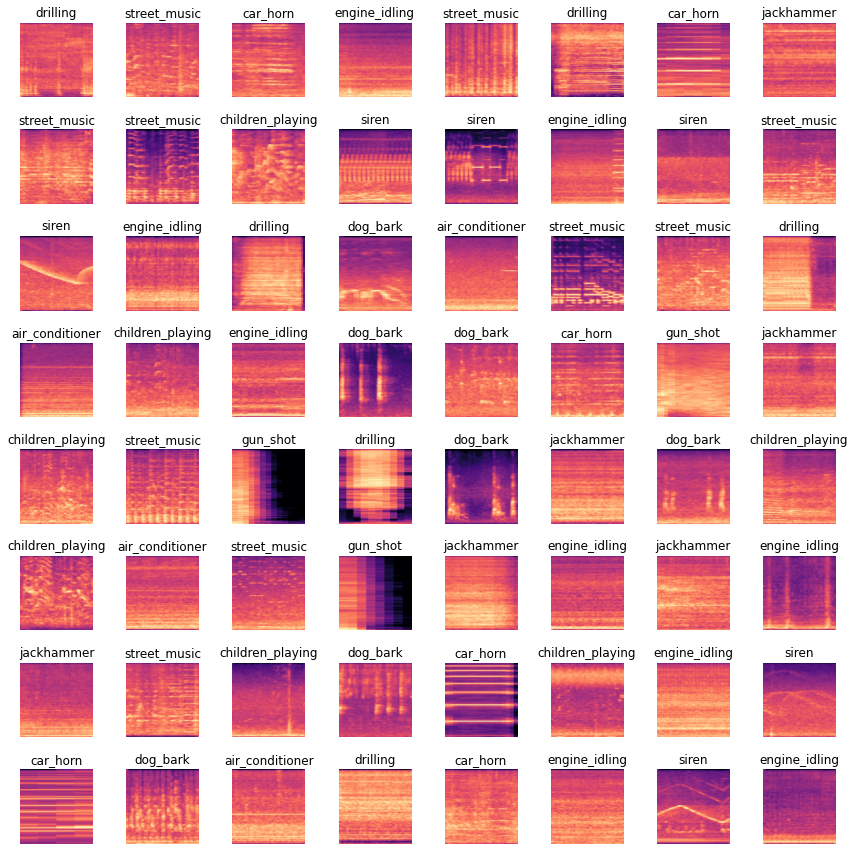

In [20]:
data1FF.show_batch(rows=8, figsize=(12,12))

In [18]:
data1FF.classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [24]:
data1FF['valid']

ImageDataBunch;

Train: LabelList (7859 items)
x: ImageList
Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217)
y: CategoryList
air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner
Path: ..\downsampled\imagenet_structure\1;

Valid: LabelList (873 items)
x: ImageList
Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217),Image (3, 223, 217)
y: CategoryList
air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner
Path: ..\downsampled\imagenet_structure\1;

Test: None

In [18]:
def train_fold(fold, train = 'train', valid = 'valid', test = None, valid_pct = None):
    data_directory = Path("../downsampled/imagenet_structure/")
    data = ImageDataBunch.from_folder(data_directory/fold, ds_tfms=[], size=224, train = train, valid = valid, test = test, valid_pct = valid_pct)
    data.normalize(imagenet_stats)
    learn = cnn_learner(data, models.resnet34, metrics=error_rate)
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))
    return learn

In [20]:
%%time
#learn_fold1 = train_fold("1")

epoch,train_loss,valid_loss,error_rate,time
0,1.390410,1.089101,0.337915,02:47
1,0.786164,0.927158,0.293242,02:46
2,0.525203,0.902179,0.285223,02:40


epoch,train_loss,valid_loss,error_rate,time
0,0.488830,0.760335,0.249714,03:16


epoch,train_loss,valid_loss,error_rate,time
0,0.219183,0.787033,0.257732,03:12
1,0.170993,0.793787,0.255441,03:17
2,0.140598,0.796529,0.260023,03:16


Wall time: 21min 20s


# Train Full

In [40]:
%%time
torch.cuda.empty_cache()
learn_full = train_fold("1", valid_pct = 0)

Wall time: 16min 18s


In [41]:
learn_full.export('D:/Classes/Robotics/capstone-project-3/audio/resnet/models/fastai_full.pkl')

In [21]:
#learn_test_data = learn_test.data

In [22]:
#direct = Path("../downsampled/imagenet_structure/")
#dataF1 = ImageDataBunch.from_folder(direct/'1', ds_tfms=[], size=224)

In [23]:
#learn_test.data = dataF1

In [25]:
#predictions_test = learn_test.get_preds(ds_type=DatasetType.Valid)

In [27]:
# label_dict = {v: i for i,v in enumerate(learn_test.data.classes)}
# pred_test = list(np.array(predictions_test[1]))
# truth_test = [label_dict[str(c)] for c in learn_test.data.valid_ds.y]

In [28]:
# print(classification_report(y_true = truth_test, y_pred = pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00        86
           9       1.00      1.00      1.00       100

    accuracy                           1.00       873
   macro avg       1.00      1.00      1.00       873
weighted avg       1.00      1.00      1.00       873



In [39]:
%%time
str(learn_test.predict(open_image("D:/Classes/Robotics/capstone-project-3/audio/downsampled/imagenet_structure/1/train/children_playing/6902-2-0-4.png"))[0])

Wall time: 34.9 ms


'gun_shot'

In [57]:
open_image("D:/Classes/Robotics/capstone-project-3/audio/downsampled/imagenet_structure/1/train/children_playing/6902-2-0-4.png").shape

torch.Size([3, 217, 223])

# ONNX Export

In [45]:
learn_full.save('D:/Classes/Robotics/capstone-project-3/audio/resnet/models/fastai_resnet')
learn_full.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [47]:
dummy_x = torch.randn(1, 3, 224, 224, requires_grad=False).cuda()
torch_out = torch.onnx._export(learn_full.model, dummy_x, "D:/Classes/Robotics/capstone-project-3/audio/resnet/models/urban_resnet.onnx", export_params=True)

In [58]:
class Model_permute(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    
    def forward(self, x):    
        x = x.permute(0,3,1,2).contiguous() #try without contiguous?
        return self.model(x)

# ONNX to TF

In [61]:
import onnx
from onnx_tf.backend import prepare

onnx_model = onnx.load("D:/Classes/Robotics/capstone-project-3/audio/resnet/models/urban_resnet.onnx")  # load onnx model
tf_rep = prepare(onnx_model)  # prepare tf representation
tf_rep.export_graph("D:/Classes/Robotics/capstone-project-3/audio/resnet/models/urban_resnet.pb")  # export the model

c:\users\audrey\anaconda3\envs\gpu36-pip\lib\site-packages\onnx_tf\common\__init__.py:89: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)


AttributeError: module 'tensorflow' has no attribute 'ceil'

# OLD: TF Data Load

In [21]:
#torch.cuda.get_device_name(0)
torch.cuda.current_device()

0

In [7]:
def pad(arr, pad_shape = (224, 224, 3)):
    from math import floor, ceil
    return np.pad(arr, 
                  pad_width = (
                      (ceil((pad_shape[0]-arr.shape[0])/2), floor((pad_shape[0]-arr.shape[0])/2)), 
                      (ceil((pad_shape[1]-arr.shape[1])/2), floor((pad_shape[1]-arr.shape[1])/2)),
                      (0,0)
                  ))

def load_image(filepath):
    from tensorflow.keras.preprocessing.image import load_img
    return np.rollaxis(pad(np.array(load_img(filepath))),2,0)

In [21]:
from tensorflow.keras.utils import to_categorical

In [8]:
test_fold = 1

X_train = np.asarray([load_image(f"{fulldatasetpath}/spectrogram/{i.replace('.wav','.png')}") 
                for i in metadata[metadata['fold']!=test_fold]['slice_file_name']])
y_train = to_categorical(np.asarray(metadata[metadata['fold']!=test_fold]['classID']))
X_test = np.asarray([load_image(f"{fulldatasetpath}/spectrogram/{i.replace('.wav','.png')}") 
                for i in metadata[metadata['fold']==test_fold]['slice_file_name']])
y_test = to_categorical(np.asarray(metadata[metadata['fold']==test_fold]['classID']))

# Resnet Model

In [9]:
ResNet18, preprocess_input = Classifiers.get('resnet18')

In [10]:
base_model = ResNet18(input_shape=(3,224,224), weights='imagenet', include_top=False)

In [11]:
n_classes = 10
l = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation='softmax')(l)
model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])

In [12]:
optimizer = tf.keras.optimizers.SGD()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
from utils.keras_one_cycle import *

In [14]:
if not os.path.exists('weights/'):
    os.makedirs('weights/')

In [15]:
weights_file = 'weights/UrbanResnet.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    weights_file, monitor='val_acc', save_best_only=True,save_weights_only=True, mode='max')

In [16]:
num_samples = len(X_train)
batch_size = 64

In [20]:
y_train.shape

(7859,)

In [17]:
lr_callback = LRFinder(num_samples, batch_size, minimum_lr=1e-3, maximum_lr=10.,
                     lr_scale='exp',
                     # validation_data=(X_test, Y_test),  # use the validation data for losses
                     # validation_sample_rate=5,
                     save_dir='weights/', verbose=True)

In [27]:
model.fit(X_train, y_train, epochs=1, batch_size=batch_size, callbacks=[lr_callback])

Train on 7859 samples


KeyError: 'running_loss_'

# Old code from HMM

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import classification_report
import pickle
from UrbanHMM import UrbanHMMClassifier




parameters = {
    'num_cep_coef': [25,30,35,40,45,50], 
    'num_states':[2,3,4,5,6]
}

gKFold = GroupKFold(n_splits = 10)
urban_hmm = UrbanHMMClassifier(class_map = class_mapping)
grid_search = GridSearchCV(urban_hmm, parameters, cv = gKFold, n_jobs = -1, verbose = 1)
grid_search.fit(X = list(fulldatasetpath + metadata['slice_file_name'].astype(str)), 
               y = le.transform(metadata['class']),
               groups = metadata['fold'])

best_filename = "./models/hmm_cvbest_f1_{}.pkl".format(str(grid_search.best_score_)[2:10])
pickle.dump(grid_search.best_estimator_, open(best_filename, "wb"))


cv_filename = "./models/hmm_cv_f1_{}.pkl".format(str(grid_search.best_score_)[2:10])
pickle.dump(grid_search, open(cv_filename, "wb"))


print("\n-----------GRID SEARCH RANKING----------\n")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\n---------FULL TRAIN REPORT------------\n")
y_true = le.transform(metadata['class'])
predict  = grid_search.best_estimator_.predict(
    X = list(fulldatasetpath + metadata['slice_file_name'].astype(str)))
print(classification_report(y_true, predict, target_names=sorted(class_mapping, key=class_mapping.get)))


In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
from sklearn.metrics import f1_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import librosa
from sklearn.base import BaseEstimator, ClassifierMixin

class UrbanResNetClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,
                 num_class=10,
                 sr=8000):
        self.num_class = num_class
        self.sr = sr
        self.model_name = 'ResNet34'
        self.objective = 'multi:softmax'
        self._initialize_model()

    def _initialize_model(self):
        self.model = XGBClassifier(max_depth=self.max_depth,
                                   learning_rate=self.learning_rate,
                                   num_rounds=self.num_rounds,
                                   reg_lambda=self.reg_lambda,
                                   objective=self.objective,
                                   num_class=self.num_class)

    def _check_shape(self, input_):
        if type(input_) == str:
            return np.array(input_).reshape(1, -1)
        if (type(input_) == list) | (isinstance(input_, pd.Series)):
            return np.array(input_).reshape(-1, 1)
        elif input_.shape == ():
            return input_.reshape(1, -1)
        elif (len(input_.shape) == 1) & (input_.shape[0] >= 1):
            return input_.reshape(-1, 1)
        elif (len(input_.shape) == 2) & (input_.shape[0] >= 1):
            return input_
        else:
            raise ValueError("Array is not in the correct shape. {}".format(input_.shape))

    def _extract_features(self, file):
        try:
            signal, sampling_freq = librosa.load(file, sr=self.sr)
        except Exception as e:
            print(e)
            print("Failed to read {}".format(file))
        # Extract features
        # Default values:
        # winlen=0.025, winstep=0.01, nfilt=26, nfft=512,
        sampling_freq = 8000
        fmin = 24.5
        n_bands = 5
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            mfcc = librosa.feature.mfcc(y=signal, sr=self.sr, n_mfcc=self.num_cep_coef)
            chroma = librosa.feature.chroma_cqt(y=signal, sr=sampling_freq, fmin=fmin)
            contrast = librosa.feature.spectral_contrast(y=signal, sr=sampling_freq, n_bands=n_bands)
            features = np.concatenate((mfcc, chroma, contrast), axis=0).T
        return features

    def _preprocessXY(self, X, y):
        X_frames = np.array([])
        y_frames = np.array([])

        for i, file in enumerate(X):
            # Extract the current filepath and read the file
            features = self._extract_features(file)
            # Append features to the variable X
            if len(X_frames) == 0:
                X_frames = features
                y_frames = np.array([y[i]] * features.shape[0])
            else:
                X_frames = np.append(X_frames, features, axis=0)
                y_frames = np.append(y_frames, np.array([y[i]] * features.shape[0]), axis=0)
        return self._check_shape(X_frames), self._check_shape(y_frames)

    def fit(self, X, y, verbose=False):

        self.le_ = LabelEncoder().fit(y)
        self.classes_ = self.le_.classes_
        transformed_y = self.le_.transform(y)

        if len(self.classes_) != self.num_class:
            raise ValueError(
                "Training data does not have same number of classes as class_map.\nExpecting{}, got {}".format(
                    self.num_classes, self.classes_))

        X_frames, y_frames = self._preprocessXY(X, transformed_y)

        self.model.fit(X_frames, y_frames)

        return self

    def _predict(self, files):

        return [self.model.predict(self._extract_features(file)) for file in files]

    def predict(self, X, prediction_type="labels"):

        if prediction_type not in ("labels", "ids"):
            raise ValueError('prediction_type must be "labels" or "ids"')

        predictions = self._predict(X)
        maj = [np.argmax(np.bincount(p)) for p in predictions]
        if prediction_type == "labels":
            maj = self.le_.inverse_transform(maj)
        return maj

    def score(self, X, y):
        y_pred = self.predict(X)
        return f1_score(y, y_pred, average='macro')

In [ ]:
ResNet34, preprocess_input = Classifiers.get('resnet34')
model = ResNet34((224, 224, 3), weights='imagenet')